# ACM-AI-Task3
## SVM, Decision Trees, Random Forests
* Hesam Asadollahzadeh
* Adib Rezaei

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## 2.1 Reading the dataset and preprocessing

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2.2 Data visualization

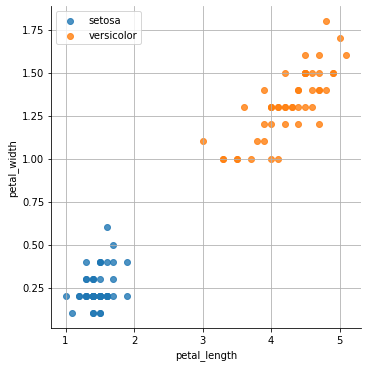

In [4]:
df = iris[iris['species'] != 'virginica']
sns.lmplot(data=df, x = 'petal_length', y = 'petal_width', hue = 'species', fit_reg=False, legend=False, height=5)
plt.legend()
plt.grid()
plt.show()

## 2.3 Train a binary SVC

In [5]:
from sklearn import svm

In [6]:
X = df[['petal_length', 'petal_width']]  # petal length, petal width
species = {'setosa': 0, 'versicolor': 1}
y = [species[x] for x in df["species"]]
print(X)

    petal_length  petal_width
0            1.4          0.2
1            1.4          0.2
2            1.3          0.2
3            1.5          0.2
4            1.4          0.2
..           ...          ...
95           4.2          1.2
96           4.2          1.3
97           4.3          1.3
98           3.0          1.1
99           4.1          1.3

[100 rows x 2 columns]


In [7]:
clf = svm.SVC(kernel = 'linear', C = 1E10)
clf.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [8]:
def plot_svc_decision_function(model):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 40)
    y = np.linspace(ylim[0], ylim[1], 40)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

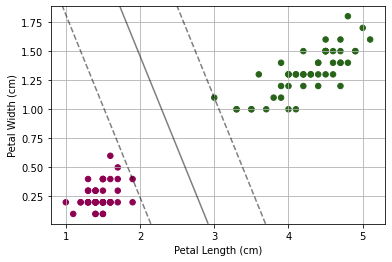

In [9]:
plt.scatter(X['petal_length'], X['petal_width'], c=y, s=30, cmap='PiYG')
plt.xlabel('Petal Length (cm)'); plt.ylabel('Petal Width (cm)');
plt.grid()
plot_svc_decision_function(clf)

## 2.4 Checking sensitivity to scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
StdX = scaler.fit_transform(X)

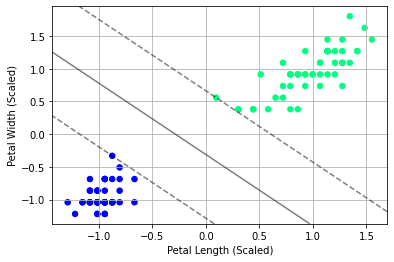

In [11]:
Stdclf = svm.SVC(kernel = 'linear', C = 1E10)
Stdclf.fit(StdX, y)
plt.scatter(StdX[:, 0], StdX[:, 1], c=y, s=30, cmap='winter')
plt.xlabel('Petal Length (Scaled)'); plt.ylabel('Petal Width (Scaled)');
plt.grid()
plot_svc_decision_function(Stdclf)

## 2.5 Visualizing the whole data

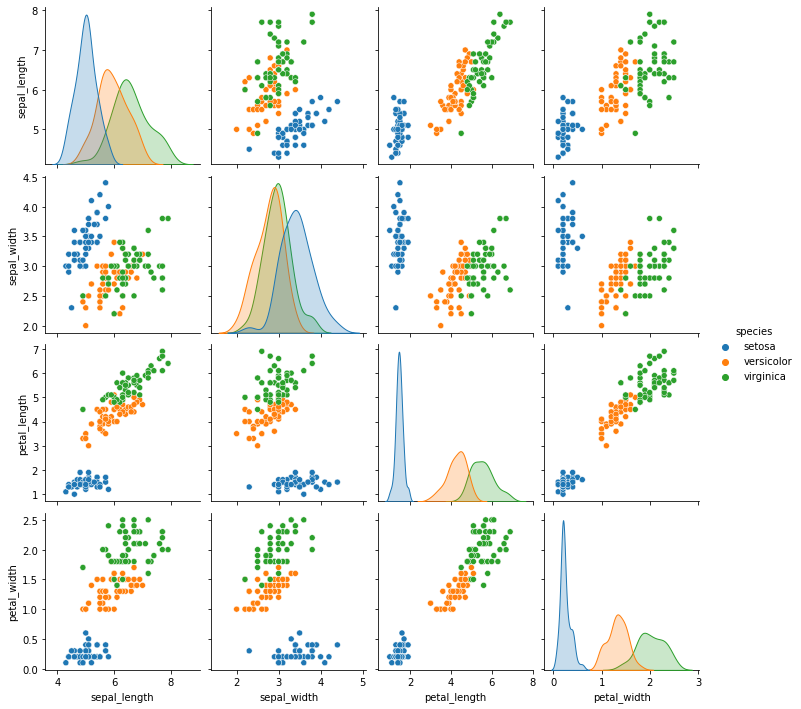

In [12]:
sns.pairplot(iris, hue='species', height=2.5) 
plt.show()